In [201]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [202]:
test = np.load("../data/test.npy")

In [203]:
test.shape

(1440, 100, 100)

In [204]:
results = np.load("../results/cnn_convlstm_seq2seq_win11_3/predictions.npy", allow_pickle=True)

In [205]:
results[0]['targets'].shape

(10000, 12)

In [206]:
first_sample = results[0]

targets = first_sample["targets"]
print(targets.shape)
# print(targets)

predictions = first_sample["predictions"]
print(predictions.shape)
# print(predictions)

inputs = first_sample["input"]
print(inputs.shape)

(10000, 12)
(10000, 12, 1)
(10000, 12, 11, 11)


In [207]:
test[12].shape
targets.shape

(10000, 12)

In [208]:
np.allclose(test[12], targets[:, 0].reshape(100, 100))

True

In [209]:
def draw_grid(data):
    plt.pcolormesh(data, cmap='terrain',  vmin=-0.51, vmax=3.7)
#     plt.colorbar(label="Traffic volume")

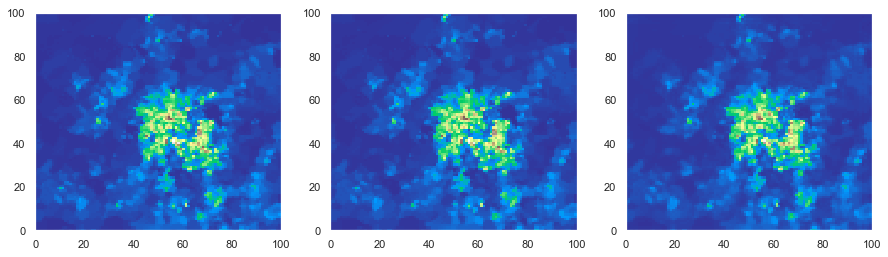

In [210]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
draw_grid(test[12])

plt.subplot(1, 3, 2)
draw_grid(targets[:, 0].reshape(100, 100))

plt.subplot(1, 3, 3)
draw_grid(predictions[:, 0].reshape(100, 100))

In [211]:
def single_cell_prediction(inputs, targets, predictions, cell=(47, 55)):
    x_grid = np.arange(inputs.shape[1]) * 10
    x_grid_2 = (np.arange(targets.shape[1]) + inputs.shape[1]) * 10
    
    # inputs shape is (10000, 12, 11, 11)
    input_points = inputs.reshape(100, 100, 12, 11, 11)[cell[0], cell[1], :, 5, 5]
    # targets shape is (10000, 12)
    target_points = targets.reshape(100, 100, 12)[cell]
    # predictions shape is (10000, 12)
    prediction_points = predictions.reshape(100, 100, 12)[cell]
    
    plt.plot(x_grid, input_points, label="inputs")
    plt.plot(x_grid_2, target_points, label="targets")
    plt.plot(x_grid_2, prediction_points, label="predictions")
    
    plt.legend()
    
    return (min(np.min(input_points), np.min(target_points), np.min(prediction_points)),
        max(np.max(input_points), np.max(target_points), np.max(prediction_points)))

In [212]:
def plot_cells(inputs, targets, predictions, cells=None):
    if cells is None:
        cells = [(47, 55), (50, 55), (55, 57), 
                 (40, 50), (20, 20), (60, 70),
                 (47, 53), (55, 55), (48, 56)]
        
    n_rows = len(cells) // 3
    
    plt.figure(figsize=(17, 3.35 * n_rows))

    min_value = float('inf')
    max_value = -float('inf')
    axis = []
    for i, cell in enumerate(cells):
        ax = plt.subplot(n_rows, 3, i+1)
        axis.append(ax)
        min_cand, max_cand = single_cell_prediction(inputs, targets, predictions, cell=cell)

        # find min and max values for axis limits
        if min_cand < min_value:
            min_value = min_cand

        if max_cand > max_value:
            max_value = max_cand

    # set constant axis limits for all plots for better visual representation
    print(f"max: {max_value}")
    for ax in axis:
        ax.set_ylim([min_value - 0.5, max_value + 0.5])

max: 3.439322063488198


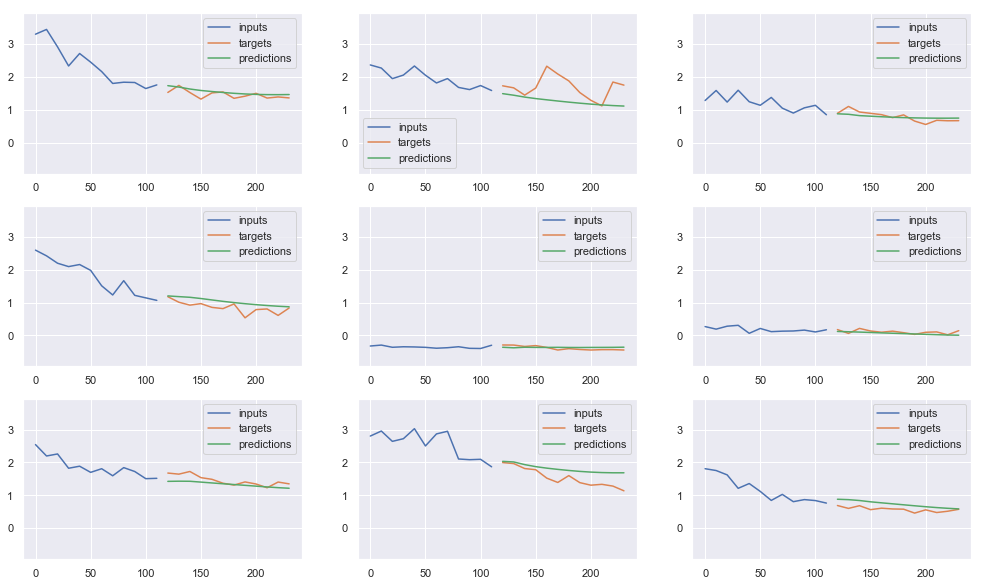

In [213]:
plot_cells(inputs, targets, predictions)

In [214]:
third_sample = results[2]

targets_3 = third_sample["targets"]
predictions_3 = third_sample["predictions"]
inputs_3 = third_sample["input"]

max: 12.064108453288886


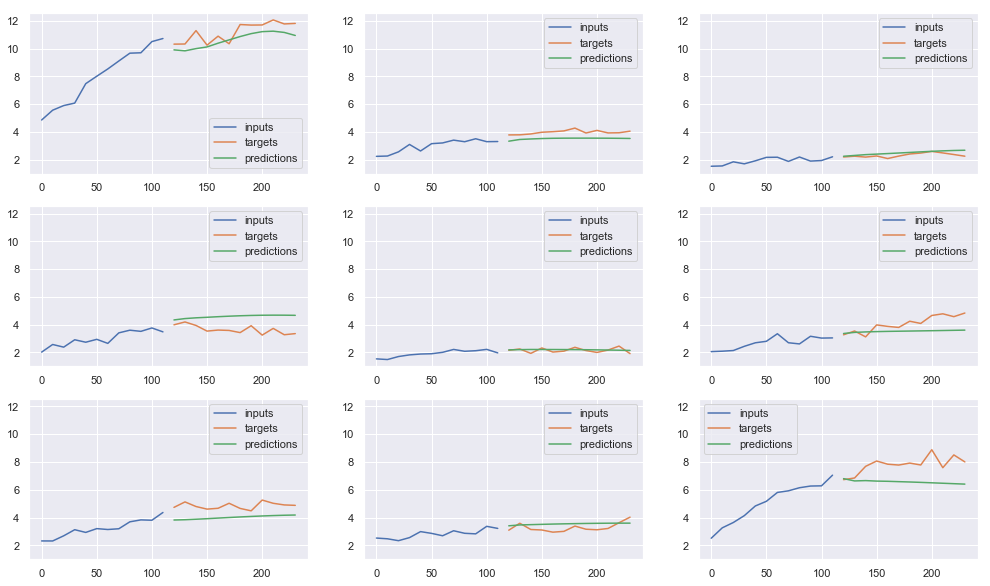

In [215]:
cells = [(47, 55), (50, 55), (55, 57), 
         (40, 50), (50, 51), (48, 50),
         (47, 53), (55, 55), (48, 56)]
plot_cells(inputs_3, targets_3, predictions_3, cells=cells)

### Extreme values

max: 29.042480944099193


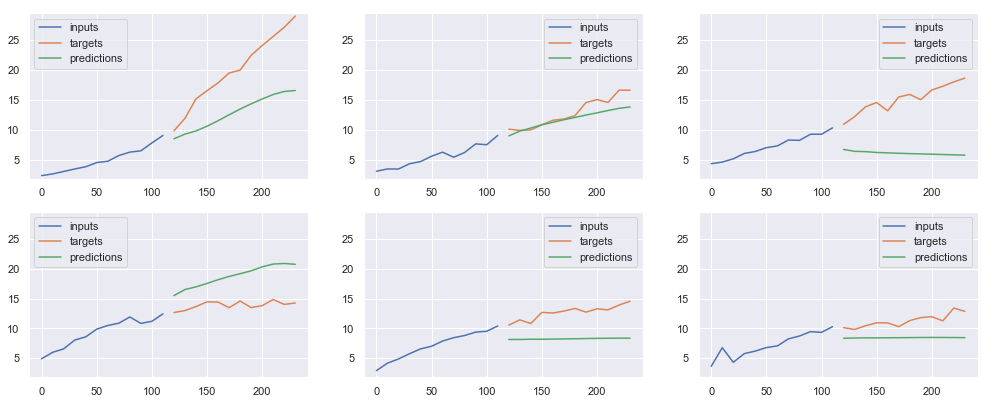

In [216]:
cells = [(48, 60), (47, 61), (49, 58),
         (47, 58), (48, 58), (47, 57)]
plot_cells(inputs_3, targets_3, predictions_3, cells=cells)

In [199]:

np.where(targets_3 > 13)

(array([4757, 4758, 4758, 4758, 4758, 4758, 4758, 4758, 4758, 4758, 4758,
        4761, 4761, 4761, 4761, 4761, 4858, 4858, 4858, 4858, 4858, 4860,
        4860, 4860, 4860, 4860, 4860, 4860, 4860, 4860, 4860, 4861, 4861,
        4861, 4958, 4958, 4958, 4958, 4958, 4958, 4958, 4958, 4958, 4958,
        4960, 4960, 4960, 4960, 4960]),
 array([10,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  7,  8,  9, 10, 11,  6,
         8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  9, 10, 11,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  7,  8,  9, 10, 11]))